# Handwritten recognition using MNSIT – CNN

In [2]:
# import required library packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

2023-05-08 09:23:32.532322: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-08 09:23:32.656688: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-08 09:23:32.657432: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 09:23:33.657193: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [4]:
# import library packages for plotting the dataset
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
import random

In [5]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

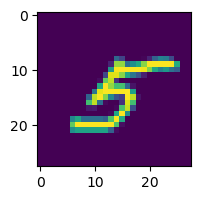

In [6]:
# Display some random examples from the training data
num_examples = 1
rand_indices = np.random.randint(len(x_train), size=num_examples)
tem= random.randint(1,1000)
images = x_train[tem]
labels = y_train[tem]
fig, axs = plt.subplots(1, num_examples, figsize=(20, 2))
plt.imshow(images)
plt.show()

In [7]:
# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [8]:
# Define the model
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [9]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 10s 21ms/step - loss: 0.3402 - accuracy: 0.8990 - val_loss: 0.0929 - val_accuracy: 0.9719
Epoch 2/5
469/469 [==============================] - 10s 20ms/step - loss: 0.1291 - accuracy: 0.9621 - val_loss: 0.0617 - val_accuracy: 0.9794
Epoch 3/5
469/469 [==============================] - 12s 25ms/step - loss: 0.0927 - accuracy: 0.9725 - val_loss: 0.0523 - val_accuracy: 0.9813
Epoch 4/5
469/469 [==============================] - 12s 25ms/step - loss: 0.0766 - accuracy: 0.9775 - val_loss: 0.0447 - val_accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 11s 24ms/step - loss: 0.0667 - accuracy: 0.9797 - val_loss: 0.0437 - val_accuracy: 0.9852


In [11]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.043746259063482285
Test accuracy: 0.9851999878883362


In [12]:
# Make predictions on test data
predictions = model.predict(x_test)
x=model.predict(images.reshape(1,28,28,1))

np.argmax(x,axis=1)

1/1 [==============================] - 0s 44ms/step


array([5])